In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipba-17-nlp-with-disaster-tweets-2024/sample_submission.csv
/kaggle/input/ipba-17-nlp-with-disaster-tweets-2024/train.csv
/kaggle/input/ipba-17-nlp-with-disaster-tweets-2024/test.csv


In [2]:
# For Preprocesssing Text Data
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Import the train test split
from sklearn.model_selection import train_test_split

# Check Performance
from sklearn.metrics import classification_report

In [3]:
df=pd.read_csv('/kaggle/input/ipba-17-nlp-with-disaster-tweets-2024/train.csv')

In [4]:
df.head(20)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


# Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


<Axes: xlabel='target'>

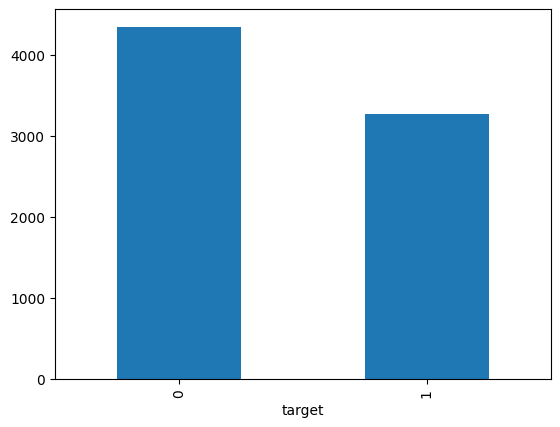

In [6]:
df['target'].value_counts().plot.bar()

In [7]:
df.shape

(7613, 5)

In [8]:
df['text_length'] = df['text'].apply(lambda x : len(x))

In [9]:
max(df['text_length'])

157

<Axes: ylabel='Frequency'>

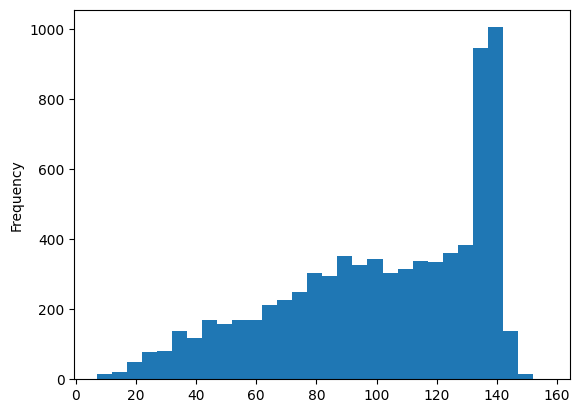

In [10]:
df['text_length'].plot.hist(bins = 30)

In [11]:
print(df.isnull().sum())

id                0
keyword          61
location       2533
text              0
target            0
text_length       0
dtype: int64


In [12]:
df['keyword'].fillna('empty', inplace=True)
df['location'].fillna('empty', inplace=True)

/tmp/ipykernel_18/1751759285.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['keyword'].fillna('empty', inplace=True)
/tmp/ipykernel_18/1751759285.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [13]:
print(df.isnull().sum())

id             0
keyword        0
location       0
text           0
target         0
text_length    0
dtype: int64


## Perform Punctuation Removal and Convert to Lower Case

In [14]:
df['text'].apply(lambda x : x.lower())
df['keyword'].apply(lambda x : x.lower())
df['location'].apply(lambda x : x.lower())

0       empty
1       empty
2       empty
3       empty
4       empty
        ...  
7608    empty
7609    empty
7610    empty
7611    empty
7612    empty
Name: location, Length: 7613, dtype: object

In [15]:
df['text'] = df['text'].apply(lambda x : x.lower())
df['keyword'] = df['keyword'].apply(lambda x : x.lower())
df['location'] = df['location'].apply(lambda x : x.lower())

In [16]:
df.head(5)

,id,keyword,location,text,target,text_length
0,1,empty,empty,our deeds are the reason of this #earthquake m...,1,69
1,4,empty,empty,forest fire near la ronge sask. canada,1,38
2,5,empty,empty,all residents asked to 'shelter in place' are ...,1,133
3,6,empty,empty,"13,000 people receive #wildfires evacuation or...",1,65
4,7,empty,empty,just got sent this photo from ruby #alaska as ...,1,88


In [17]:
import re
# Function to remove punctuation from a given text
def remove_punctuation(text):
    # Use a regular expression to remove punctuation
    return re.sub(r'[^\w\s]', '', text)

# Apply the function to the 'text' column
df['text'] = df['text'].apply(remove_punctuation)

# Function to remove punctuation from a given text
def remove_punctuation(keyword):
    # Use a regular expression to remove punctuation
    return re.sub(r'[^\w\s]', '', keyword)

# Apply the function to the 'text' column
df['keyword'] = df['keyword'].apply(remove_punctuation)

# Function to remove punctuation from a given text
def remove_punctuation(location):
    # Use a regular expression to remove punctuation
    return re.sub(r'[^\w\s]', '', location)

# Apply the function to the 'text' column
df['location'] = df['location'].apply(remove_punctuation)

## Remove Stop Words

In [18]:
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
# Tokenize and Remove Stop Words
df['text'].apply(lambda x: [word for word in x.split() if word not in stop])
df['keyword'].apply(lambda x: [word for word in x.split() if word not in stop])
df['location'].apply(lambda x: [word for word in x.split() if word not in stop])

0       [empty]
1       [empty]
2       [empty]
3       [empty]
4       [empty]
         ...   
7608    [empty]
7609    [empty]
7610    [empty]
7611    [empty]
7612    [empty]
Name: location, Length: 7613, dtype: object

In [21]:
# Join the words back
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['keyword'] = df['keyword'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['location'] = df['location'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [22]:
df.head()

,id,keyword,location,text,target,text_length
0,1,empty,empty,deeds reason earthquake may allah forgive us,1,69
1,4,empty,empty,forest fire near la ronge sask canada,1,38
2,5,empty,empty,residents asked shelter place notified officer...,1,133
3,6,empty,empty,13000 people receive wildfires evacuation orde...,1,65
4,7,empty,empty,got sent photo ruby alaska smoke wildfires pou...,1,88


## Perform Lemmatization or Stemming (only one)

In [23]:
nltk.download('wordnet')
nltk.download('wordnet2022')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet2022 to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/wordnet2022.zip.


True

In [24]:
! cp -rf /usr/share/nltk_data/corpora/wordnet2022 /usr/share/nltk_data/corpora/wordnet # temp fix for lookup error.

In [25]:
wordnet = WordNetLemmatizer()

In [26]:
nltk.download('omw-1.4')
# Lemmatize
df['text'].apply(lambda x : wordnet.lemmatize(x))
df['keyword'].apply(lambda x : wordnet.lemmatize(x))
df['location'].apply(lambda x : wordnet.lemmatize(x))

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


0       empty
1       empty
2       empty
3       empty
4       empty
        ...  
7608    empty
7609    empty
7610    empty
7611    empty
7612    empty
Name: location, Length: 7613, dtype: object

In [27]:
# Commit to Table
df['text'] = df['text'].apply(lambda x : wordnet.lemmatize(x))
df['keyword'] = df['keyword'].apply(lambda x : wordnet.lemmatize(x))
df['location'] = df['location'].apply(lambda x : wordnet.lemmatize(x))

In [28]:
df.head()

,id,keyword,location,text,target,text_length
0,1,empty,empty,deeds reason earthquake may allah forgive us,1,69
1,4,empty,empty,forest fire near la ronge sask canada,1,38
2,5,empty,empty,residents asked shelter place notified officer...,1,133
3,6,empty,empty,13000 people receive wildfires evacuation orde...,1,65
4,7,empty,empty,got sent photo ruby alaska smoke wildfires pou...,1,88


In [29]:
# Create Length Feature
df['post_text_length'] = df['text'].apply(lambda x : len(x))
df.head()

,id,keyword,location,text,target,text_length,post_text_length
0,1,empty,empty,deeds reason earthquake may allah forgive us,1,69,44
1,4,empty,empty,forest fire near la ronge sask canada,1,38,37
2,5,empty,empty,residents asked shelter place notified officer...,1,133,88
3,6,empty,empty,13000 people receive wildfires evacuation orde...,1,65,59
4,7,empty,empty,got sent photo ruby alaska smoke wildfires pou...,1,88,55


## Code to perform train & test split

In [30]:
y = df['target']
X = df.drop(columns=['target', 'id'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets to verify
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (6090, 5)
y_train shape: (6090,)
X_test shape: (1523, 5)
y_test shape: (1523,)


In [31]:
X_train.head(50)

,keyword,location,text,text_length,post_text_length
4996,military,texas,courageous honest analysis need use atomic bom...,140,119
3263,engulfed,empty,zachzaidman 670thescore wld b shame golf cart ...,98,81
4907,massacre,cottonwood arizona,tell barackobama rescind medals honor given us...,143,108
2855,drought,spokane wa,worried ca drought might affect extreme weathe...,118,80
4716,lava,medanindonesia,youngheroesid lava blast amp power red panther...,82,76
7538,wreckage,empty,wreckage conclusively confirmed mh370 malaysia...,136,90
3172,emergency20plan,ireland,builder dental emergency ruined plan emotional...,124,73
3932,flood,empty,bmx issues areal flood advisory shelby al till...,93,81
5833,rubble,made detroit,360wisenews chinas stock market crash gems rub...,95,67
7173,war20zone,empty,robertoneill31 getting hit foul ball sitting h...,107,75


## Transform to CountVectorizer

In [32]:
#import count_vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=3000)

cv.fit(X_train['text'])
X_train_cv = cv.transform(X_train['text']).toarray()
X_test_cv = cv.transform(X_test['text']).toarray()

print(type(X_train))
print(type(X_train_cv))

train_with_cv = pd.DataFrame(X_train_cv, columns= cv.get_feature_names_out())
train_with_cv.head()

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


,010401,05,06,10,100,1000,101,11,11yearold,12,...,zionist,zombie,zone,åè,åê,û_,ûpolitics,ûïwhen,ûò,ûó
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Build Model

In [33]:
#import libraries and fit model 
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB().fit(X_train_cv,y_train)

y_train_pred = nb.predict(X_train_cv)
y_test_pred = nb.predict(X_test_cv)

print('Train Report ---')
print(classification_report(y_train, y_train_pred))

print('Validation Report ---')
print(classification_report(y_test, y_test_pred))

Train Report ---
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      3468
           1       0.87      0.77      0.82      2622

    accuracy                           0.85      6090
   macro avg       0.86      0.84      0.85      6090
weighted avg       0.85      0.85      0.85      6090

Validation Report ---
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       874
           1       0.79      0.70      0.74       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.79      1523
weighted avg       0.79      0.79      0.79      1523



## Write a code to build Logistic Regression Model

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Build and train Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_cv, y_train)

# Predictions
logistic_predictions = logistic_model.predict(X_test_cv)

# Model Evaluation
print("\nLogistic Regression Model:")
print("Accuracy:", accuracy_score(y_test, logistic_predictions))
print("Classification Report:\n", classification_report(y_test, logistic_predictions))

pred = pd.DataFrame(data=logistic_predictions)
pred.head()


Logistic Regression Model:
Accuracy: 0.793827971109652
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       874
           1       0.79      0.70      0.74       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.79      1523
weighted avg       0.79      0.79      0.79      1523



,0
0,0
1,0
2,0
3,0
4,0


## Write a code to build Decision Tree Model

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Build and train Decision Tree Model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_cv, y_train)

# Predictions
dt_predictions = dt_model.predict(X_test_cv)

# Model Evaluation
print("\nDecision Tree Model:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))


Decision Tree Model:
Accuracy: 0.7189757058437295
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.75       874
           1       0.67      0.68      0.67       649

    accuracy                           0.72      1523
   macro avg       0.71      0.71      0.71      1523
weighted avg       0.72      0.72      0.72      1523



## Write a code to build Random Forest Model

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Build and train Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_cv, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test_cv)

# Model Evaluation
print("\nRandom Forest Model:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))


Random Forest Model:
Accuracy: 0.7518056467498359
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79       874
           1       0.71      0.70      0.71       649

    accuracy                           0.75      1523
   macro avg       0.75      0.74      0.75      1523
weighted avg       0.75      0.75      0.75      1523



## Choose the best model and build model again

In [37]:
df1 = pd.read_csv('/kaggle/input/ipba-17-nlp-with-disaster-tweets-2024/test.csv')
df1.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [39]:
df1.shape

(3263, 4)

In [40]:
df1['text_length1'] = df1['text'].apply(lambda x : len(x))

In [41]:
max(df1['text_length1'])

151

<Axes: ylabel='Frequency'>

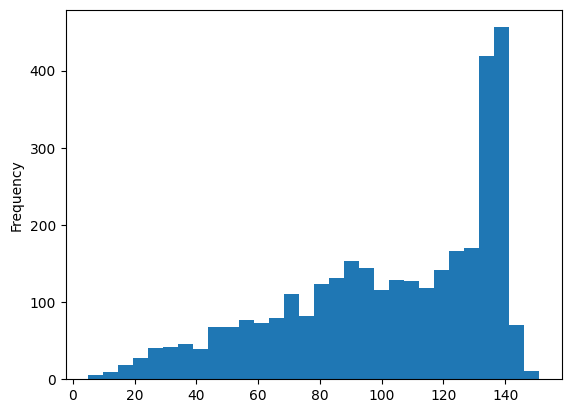

In [42]:
df1['text_length1'].plot.hist(bins = 30)

In [43]:
df1.head()

,id,keyword,location,text,text_length1
0,0,NaN,NaN,Just happened a terrible car crash,34
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",64
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",96
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,40
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,45


In [44]:
print(df1.isnull().sum())

id                 0
keyword           26
location        1105
text               0
text_length1       0
dtype: int64


In [45]:
df1['keyword'].fillna('empty', inplace=True)
df1['location'].fillna('empty', inplace=True)

/tmp/ipykernel_18/3427546185.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['keyword'].fillna('empty', inplace=True)
/tmp/ipykernel_18/3427546185.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [46]:
print(df1.isnull().sum())

id              0
keyword         0
location        0
text            0
text_length1    0
dtype: int64


In [47]:
df1['text'].apply(lambda x : x.lower())
df1['keyword'].apply(lambda x : x.lower())
df1['location'].apply(lambda x : x.lower())

0       empty
1       empty
2       empty
3       empty
4       empty
        ...  
3258    empty
3259    empty
3260    empty
3261    empty
3262    empty
Name: location, Length: 3263, dtype: object

In [48]:
df1['text'] = df1['text'].apply(lambda x : x.lower())
df1['keyword'] = df1['keyword'].apply(lambda x : x.lower())
df1['location'] = df1['location'].apply(lambda x : x.lower())

In [49]:
df1.head(5)

,id,keyword,location,text,text_length1
0,0,empty,empty,just happened a terrible car crash,34
1,2,empty,empty,"heard about #earthquake is different cities, s...",64
2,3,empty,empty,"there is a forest fire at spot pond, geese are...",96
3,9,empty,empty,apocalypse lighting. #spokane #wildfires,40
4,11,empty,empty,typhoon soudelor kills 28 in china and taiwan,45


In [50]:
import re
# Function to remove punctuation from a given text
def remove_punctuation(text):
    # Use a regular expression to remove punctuation
    return re.sub(r'[^\w\s]', '', text)

# Apply the function to the 'text' column
df1['text'] = df1['text'].apply(remove_punctuation)

# Function to remove punctuation from a given text
def remove_punctuation(keyword):
    # Use a regular expression to remove punctuation
    return re.sub(r'[^\w\s]', '', keyword)

# Apply the function to the 'text' column
df1['keyword'] = df1['keyword'].apply(remove_punctuation)

# Function to remove punctuation from a given text
def remove_punctuation(location):
    # Use a regular expression to remove punctuation
    return re.sub(r'[^\w\s]', '', location)

# Apply the function to the 'text' column
df1['location'] = df1['location'].apply(remove_punctuation)

In [51]:
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [53]:
# Tokenize and Remove Stop Words
df1['text'].apply(lambda x: [word for word in x.split() if word not in stop])
df1['keyword'].apply(lambda x: [word for word in x.split() if word not in stop])
df1['location'].apply(lambda x: [word for word in x.split() if word not in stop])

0       [empty]
1       [empty]
2       [empty]
3       [empty]
4       [empty]
         ...   
3258    [empty]
3259    [empty]
3260    [empty]
3261    [empty]
3262    [empty]
Name: location, Length: 3263, dtype: object

In [54]:
# Join the words back
df1['text'] = df1['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df1['keyword'] = df1['keyword'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df1['location'] = df1['location'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [55]:
df1.head()

,id,keyword,location,text,text_length1
0,0,empty,empty,happened terrible car crash,34
1,2,empty,empty,heard earthquake different cities stay safe ev...,64
2,3,empty,empty,forest fire spot pond geese fleeing across str...,96
3,9,empty,empty,apocalypse lighting spokane wildfires,40
4,11,empty,empty,typhoon soudelor kills 28 china taiwan,45


In [56]:
nltk.download('omw-1.4')
# Lemmatize
df1['text'].apply(lambda x : wordnet.lemmatize(x))
df1['keyword'].apply(lambda x : wordnet.lemmatize(x))
df1['location'].apply(lambda x : wordnet.lemmatize(x))

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0       empty
1       empty
2       empty
3       empty
4       empty
        ...  
3258    empty
3259    empty
3260    empty
3261    empty
3262    empty
Name: location, Length: 3263, dtype: object

In [57]:
# Commit to Table
df1['text'] = df1['text'].apply(lambda x : wordnet.lemmatize(x))
df1['keyword'] = df1['keyword'].apply(lambda x : wordnet.lemmatize(x))
df1['location'] = df1['location'].apply(lambda x : wordnet.lemmatize(x))

In [58]:
df1.head()

,id,keyword,location,text,text_length1
0,0,empty,empty,happened terrible car crash,34
1,2,empty,empty,heard earthquake different cities stay safe ev...,64
2,3,empty,empty,forest fire spot pond geese fleeing across str...,96
3,9,empty,empty,apocalypse lighting spokane wildfires,40
4,11,empty,empty,typhoon soudelor kills 28 china taiwan,45


In [59]:
# Create Length Feature
df1['post_text_length1'] = df1['text'].apply(lambda x : len(x))
df1.head()

,id,keyword,location,text,text_length1,post_text_length1
0,0,empty,empty,happened terrible car crash,34,27
1,2,empty,empty,heard earthquake different cities stay safe ev...,64,52
2,3,empty,empty,forest fire spot pond geese fleeing across str...,96,61
3,9,empty,empty,apocalypse lighting spokane wildfires,40,37
4,11,empty,empty,typhoon soudelor kills 28 china taiwan,45,38


In [60]:
#test predicitons
X_test_cv = cv.transform(df1['text']).toarray()
y_test_pred = nb.predict(X_test_cv)

# Convert predictions to a DataFrame
df3 = pd.DataFrame(y_test_pred)
df3.head()

,0
0,1
1,1
2,1
3,1
4,1


In [61]:
#import count_vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=3000)

cv.fit(X_train['text'])
X_train_cv = cv.transform(X_train['text']).toarray()
X_test_cv = cv.transform(X_test['text']).toarray()

print(type(X_train))
print(type(X_train_cv))

train_with_cv = pd.DataFrame(X_train_cv, columns= cv.get_feature_names_out())
train_with_cv.head()

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


,010401,05,06,10,100,1000,101,11,11yearold,12,...,zionist,zombie,zone,åè,åê,û_,ûpolitics,ûïwhen,ûò,ûó
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
# Predictions
rf_predictions1 = nb.predict(X_train_cv)
rf_predictions2 = nb.predict(X_test_cv)
# Convert predictions to DataFrames
df11 = pd.DataFrame({'target': rf_predictions1})
df21 = pd.DataFrame({'target': rf_predictions2})

# Concatenate DataFrames vertically
submission = pd.concat([df11, df21], ignore_index=True)
submission = pd.DataFrame(submission)
submission.head()

,target
0,1
1,0
2,1
3,1
4,0


In [63]:
df1 = pd.read_csv('/kaggle/input/ipba-17-nlp-with-disaster-tweets-2024/test.csv')
# Create a DataFrame with IDs and predictions
submission = pd.DataFrame({'id': df1['id'], 'target': df3[0]})
submission.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [64]:
# Save the DataFrame to a CSV file (adjust the filename as needed)
submission.to_csv('/kaggle/working/submission.csv', index=False)